### Which feature appears to be least useful in helping to classify the flowers?

The sepal width feature is the least useful in determing the target flower as the means for the three types are very similar.

### What was the accuracy of the model on the training data? What does this tell you about using the train-test split?

The accuracy was 0.9736, this tells us that the train-test split was a sufficient model. We train the data to predict the target on future data. The danger is overfitting the model.

# Supervised and Unsupervised Learning

We think of a given dataset upon which we are working as a representation of some actual phenomenon. As data scientists, we seek a function, $\hat{f}$ ("eff hat"), that we can use to approximate this actual phenomenon. We may take different approaches in developing this $\hat{f}$.

In some cases, we have a set of input data, often called **features**, inputs, or independent variables, and we believe that these features can be uses to predict a **target**, output or dependent variable. If we seek to develop a model that fits a set of features to a target, this is known as **Supervised Learning**. The supervision comes from the fact that the targets or outputs are known. If the target consists of elements coming from a finite set of discrete categories e.g. $\{red, blue, green\}$, $\{heads, tails\}$, then we say that the task is a **classification** task and our $\widehat{f}$ is a classfication model. If the target consists of elements coming from a continuous range of values e.g. *Age* or *SalePrice*, then we say that the task is a **regression** task and our $\widehat{f}$ is a regression model.

**NOTE**: The reasoning behind the name "regression" is historical and is not consistent with the colloquial meaning of the word.

In other cases, we might seek to develop a model from a set of features without any corresponding target data. This type of model development is known as **Unsupervised Learning**. It is unsupervised because the targets are unknown. Common unsupervised learning tasks are **clustering**, in which we attempt to assign our data to a finite number of groups, and **dimensionality reduction**.

In [1]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
plt.rc('figure', figsize=(20, 6))

In [2]:
IRIS = load_iris()

feat_names = IRIS.feature_names

iris_df = pd.DataFrame(IRIS.data, columns=feat_names)

IRIS.target_names

array(['setosa', 'versicolor', 'virginica'], 
      dtype='<U10')

### Classification

In [3]:
iris_df['target'] = IRIS.target_names[IRIS.target]

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


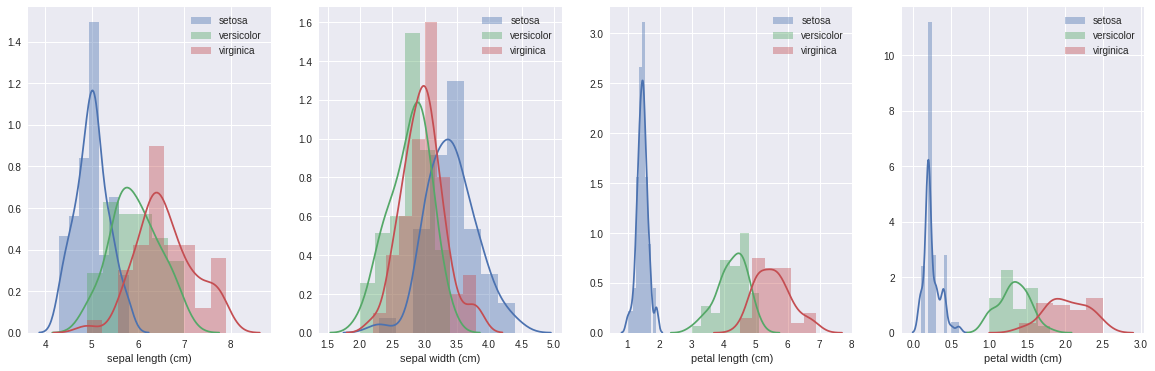

In [4]:
_, ax = plt.subplots(1,4, figsize=(20,6))

for i in range(4):
    for iris_class in iris_df.target.unique():
        plotting_df = iris_df[iris_df.target == iris_class ]
        sns.distplot(plotting_df[feat_names[i]], ax=ax[i], label=iris_class)
        ax[i].legend()

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

tree = DecisionTreeClassifier()
features = iris_df.drop('target', axis=1)
target_numerical = LabelEncoder().fit_transform(iris_df['target'])

In [11]:
(features_train,
 features_validation,
 target_train,
 target_validation) = train_test_split(features, target_numerical, random_state=10)

### Display the Classification Predictions and Actual

In [12]:
tree.fit(features_train, target_train)
target_prediction = tree.predict(features_validation)
target_prediction

array([1, 2, 0, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2, 2,
       0, 1, 0, 1, 1, 1, 2, 1, 1, 1, 2, 2, 0, 2, 2])

In [13]:
target_validation

array([1, 2, 0, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2, 2,
       0, 1, 0, 1, 1, 1, 2, 1, 1, 2, 2, 2, 0, 2, 2])

In [14]:
difference = np.abs(target_validation - target_prediction)
difference

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [15]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

number_of_dimensions = 2
pca = PCA(number_of_dimensions)

features_scaled = StandardScaler().fit_transform(features_validation)
iris_2d = pca.fit_transform(features_scaled)

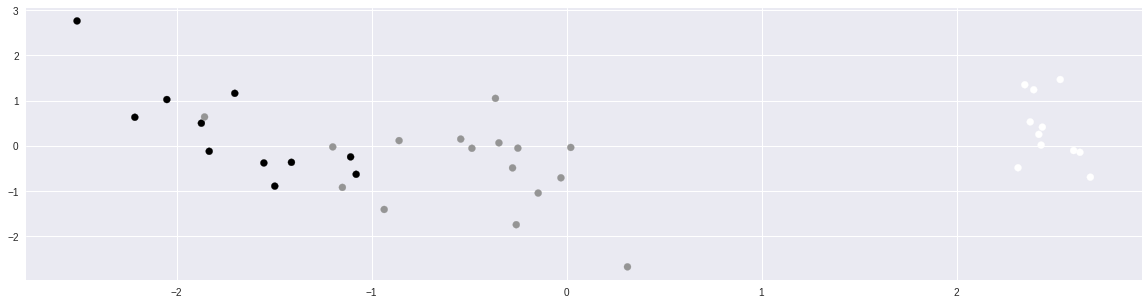

In [18]:
plt.figure(figsize=(20,5))
plt.scatter(x=iris_2d[:,0], y=iris_2d[:,1], c=target_prediction)


### Measure the Accuracy

In [21]:
def accuracy(actual, predicted):
    return 1-sum(np.abs(actual - predicted))/len(actual)

In [22]:
accuracy(target_validation, target_prediction)

0.97368421052631582